# Kepler-138

In [4]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [5]:
name = 'Kepler-138'

In [6]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))

In [19]:
obs = om.Observation.from_files(fnames, planet_letter='d')

In [20]:
obs

KEPLER-138 [3 Visits]

In [21]:
clc = lk.search_lightcurve(name, mission='Kepler', cadence='long').download_all().stitch().remove_nans().remove_outliers(8).flatten(51, sigma=2).remove_outliers(8)
clc.flux = clc.flux.value * u.electron/u.s
clc.flux_err = clc.flux_err.value * u.electron/u.s

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

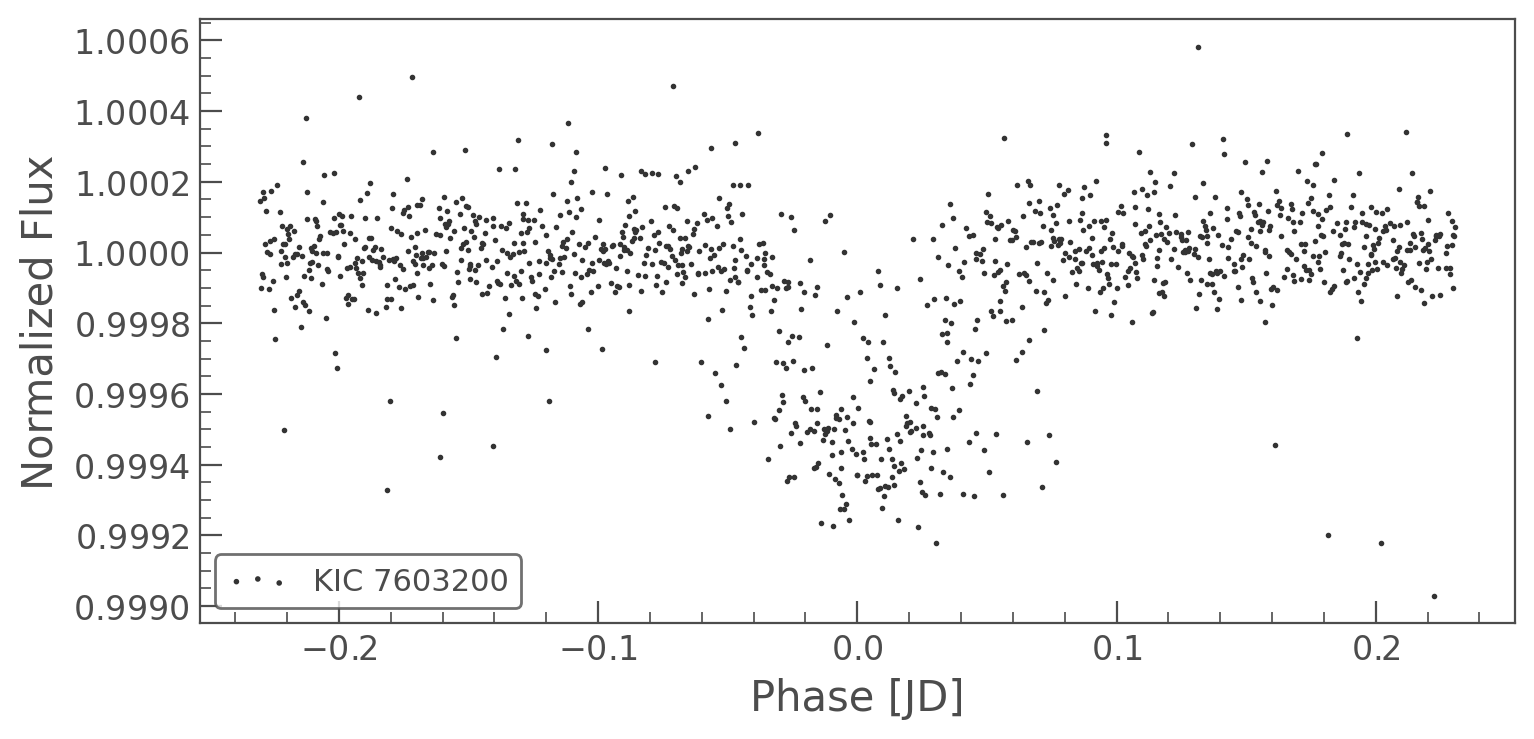

In [22]:
k = np.abs(((clc.time.value - (obs.t0 - 2454833 + obs.period/2))/obs.period) % 1 - 0.5) < 0.01
clc[k].fold(obs.period, obs.t0 - 2454833).scatter()

In [23]:
obs.fit_transit(x_suppl=clc.time.value[k] + 2454833,
                y_suppl=clc.flux.value[k],
                yerr_suppl=clc.flux_err.value[k],
                exptime_suppl=np.median(np.diff(clc.time.value)), fit_t0=False, fit_period=False, fit_inc=False, calc_eclipse=False)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

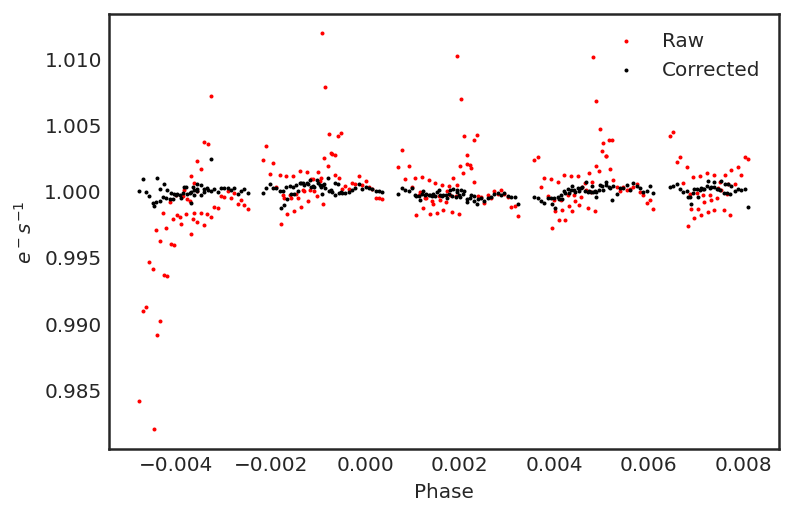

In [24]:
obs.plot()

In [15]:
obs.map_soln

{'norm_suppl': array([0.99993247]),
 't0_interval__': array(0.),
 'period_interval__': array(0.),
 'u_suppl_quadlimbdark__': array([ 9.72236649e-06, -7.46227140e-06]),
 'u_quadlimbdark__': array([1.67536464e-06, 4.08920879e-06]),
 'r_star': array(0.44),
 'm_star': array(0.52),
 'r_interval__': array(-6.21580554e-11),
 'r_suppl_interval__': array(6.95967324e-06),
 't0': array(2455696.6689),
 'period': array(23.0881),
 'u_suppl': array([7.07105862e-01, 2.63831777e-06]),
 'u': array([ 7.07108523e-01, -1.44575424e-06]),
 'r': array(0.05611298),
 'ror': array(0.1275295),
 'transit': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 

In [ ]:
obs.fit_model()

In [ ]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [ ]:
obs.plot_spectra()

In [ ]:
ax = om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 150)).plot()
ax.set(title=f'{name} Transmission Spectrum')

In [ ]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits')
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits')
except:
    pass

In [ ]:
for visit in obs:
    visit.diagnose();
    plt.show();